# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image
import matplotlib.pyplot as plt
import math
from matplotlib import colors
son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

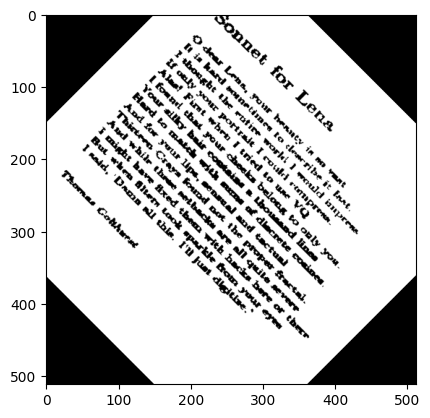

In [5]:
plt.imshow(son, cmap="gray")
plt.imshow(sonrot, cmap="gray")

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [2]:
def computeFT(I):
    return fft2(I)

def toVisualizeFT(If):
    return fftshift(np.abs(If))

def toVisualizeLogFT(If):
    return np.log(1+np.abs(If))


2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

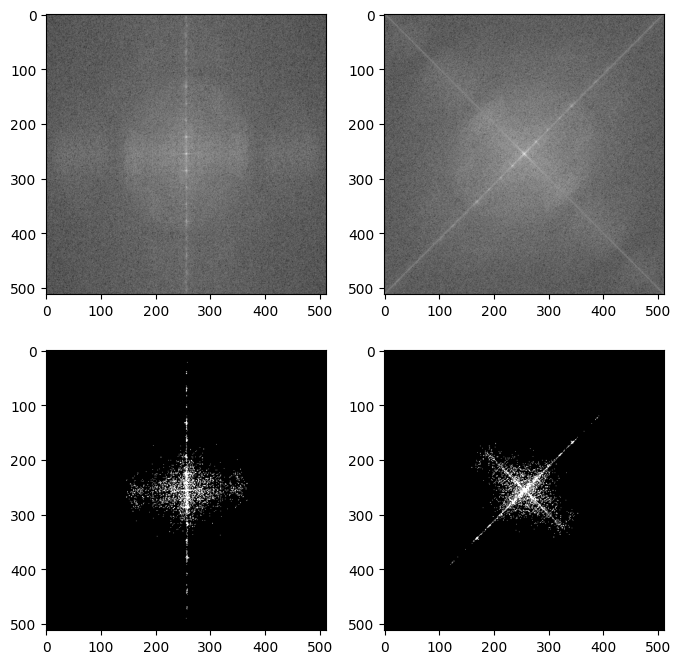

In [6]:
import matplotlib.pyplot as plt
son_FT = toVisualizeFT(computeFT(son))
sonrot_FT = toVisualizeFT(computeFT(sonrot))

f, axarr = plt.subplots(nrows=2, ncols=2,figsize=(8,8))
axarr[0,0].imshow(toVisualizeLogFT(son_FT), cmap='gray')
axarr[0,1].imshow(toVisualizeLogFT(sonrot_FT), cmap='gray')

def threshold(I, S):
    h, w = I.shape
    array = np.empty([h,w])
    for i in range(0, h):
        for j in range(0, w):
            if I[i][j] < S:
                array[i][j] = 0
            else:
                array[i][j]= 255
    return array

axarr[1,0].imshow(threshold(son_FT, 1e5), cmap="gray")
axarr[1,1].imshow(threshold(sonrot_FT, 1e5), cmap="gray")

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

Generally most of the fourier coefficients are negligibly small.
So we can threshold them out and make them manually equal to zero and keep only the largest fourier
coefficients without facing any drastic changes in the spectrum and without much loss of data in the original image
The Rotation Property means that the choice of coordinate direction would not affect the spectrum of the signal itself. If you rotate the image, the Fourrier Transform is also rotated.

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [7]:
def blend(I1,I2,alpha):
    result = alpha*I1 + (1-alpha)*I2
    return result

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

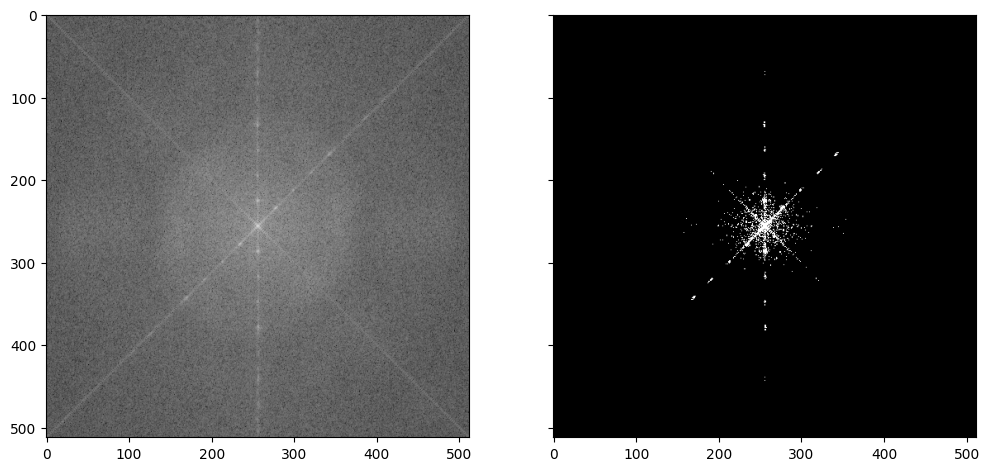

In [8]:
blended = blend(son, sonrot, 1/2)
ft = toVisualizeFT(computeFT(blended))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(toVisualizeLogFT(ft), cmap="gray")
ax2.imshow(threshold(ft, 1e5), cmap="gray")

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

We observe the linearity property of fourrier transform. The alpha defines how much each FT contributes to the blended FT.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [9]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below
def rectifyOrientation(I):
    thresholded = threshold(toVisualizeFT(computeFT(I)),3*1e5)
    orient = mainOrientation(thresholded)[1]
    return rotateImage(I, -orient)

    

8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

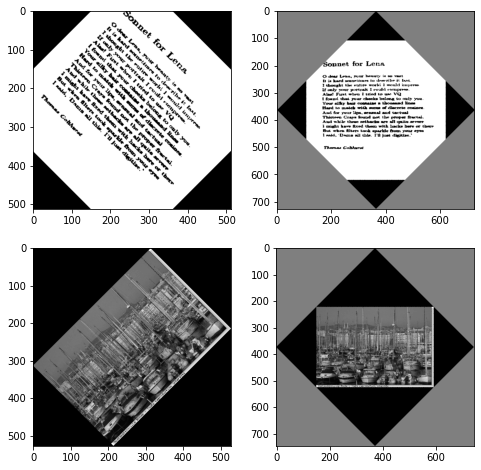

In [8]:
port = np.array(Image.open('img/port.jpg'))
#rotating the port Image
rot_port = Image.fromarray(port).rotate(45, expand=True)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ax[0,0].imshow(sonrot, cmap="gray")
ax[0,1].imshow(rectifyOrientation(sonrot), cmap="gray")
ax[1,0].imshow(rot_port, cmap="gray")
ax[1,1].imshow(rectifyOrientation(np.array(rot_port)), cmap="gray")